In [1]:
#importing necessary libraries
import requests
import json
import pandas as pd
from matplotlib import pyplot as plt
import datetime
from decouple import config
from collections import Counter
import sqlalchemy
import sqlite3

In [2]:
#data validation function
def data_validation(df):
    #checking if the dataframe is empty
    if df.empty:
        print('Yikes, No songs were downloaded')

    #checking if there are duplicates
    if pd.Series(df['played_at']).is_unique:
        pass
    else:
        raise Exception("Yikes Primary Key check violated")

    #checking for nulls
    if df.isnull().values.any():
        raise Exception("Yike!!! Found Null values")
    
    return True

#function to calculate the frequencies
# def frequencies(column_name):
    
#     print(Counter(songs_df[column_name].values))
#     print(dict(Counter(songs_df[column_name].values).most_common(5)))
    
#     bar_plot = dict(Counter(songs_df[column_name].values).most_common(5))
    
#     plt.bar(*zip(*bar_plot.items()))
#     plt.show()
    
    
# plt.title('My title')
# plt.xlabel('categories')
# plt.ylabel('values')

In [3]:
headers = {
    "Accept": "application/json",
    "Content-Type": "application/json",
    "Authorization": f"Bearer {config('TOKEN')}"
}

In [4]:
#getting today's date
today = datetime.datetime.now()
print("today:",today)

today: 2021-07-08 23:01:29.655568


In [5]:
#getting last month's date
last_month = today - datetime.timedelta(days=30)
print("last_month",last_month)

last_month 2021-06-08 23:01:29.655568


In [6]:
#converting last month's date to unix time stamp
last_month_unix_timestamp = int(last_month.timestamp()) * 1000
print("last_month_Unix",last_month_unix_timestamp)

last_month_replace = last_month.replace(hour = 0, minute = 0, second = 0, microsecond = 0)
print("last_month_Replace:",last_month_replace)

last_month_Unix 1623193289000
last_month_Replace: 2021-06-08 00:00:00


In [7]:
url = f"https://api.spotify.com/v1/me/player/recently-played?after={last_month_unix_timestamp}"
r = requests.get(url, headers = headers)

In [8]:
data = r.json()

In [9]:
song_names = []
artiste_name = []
played_at_list = []
timestamps = []

for song in data["items"]:
    song_names.append(song['track']['name'])
    artiste_name.append(song['track']['album']['artists'][0]['name'])
    played_at_list.append(song['played_at'])
    timestamps.append(song['played_at'][0:10])

In [10]:
songs_dict = {
    "song_names":song_names,
    "artiste_name":artiste_name,
    "played_at":played_at_list,
    "timestamp":timestamps
}
songs_df = pd.DataFrame(songs_dict)
print(songs_df)

                                           song_names   artiste_name  \
0                                         Pretty Girl  Adekunle Gold   
1                                                Okay  Adekunle Gold   
2                                                Okay  Adekunle Gold   
3                                                Okay  Adekunle Gold   
4                                                Okay  Adekunle Gold   
5                                                Okay  Adekunle Gold   
6                                                Okay  Adekunle Gold   
7                                                Okay  Adekunle Gold   
8                                                Okay  Adekunle Gold   
9                                                Okay  Adekunle Gold   
10                                   It Is What It Is  Adekunle Gold   
11                     Antidote (feat. Adekunle Gold)            Nao   
12                                               Onye   Mercy Ch

In [11]:
if data_validation(songs_df):
    print("Data Validation Passed!")

Data Validation Passed!


In [12]:
# viewing the number of rows and columns
songs_df.shape

(20, 4)

In [13]:
#viewing summary of a DataFrame
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   song_names    20 non-null     object
 1   artiste_name  20 non-null     object
 2   played_at     20 non-null     object
 3   timestamp     20 non-null     object
dtypes: object(4)
memory usage: 768.0+ bytes


In [14]:
#viewing some basic statistical details
songs_df.describe()

,song_names,artiste_name,played_at,timestamp
count,20,20,20,20
unique,12,3,20,1
top,Okay,Adekunle Gold,2021-07-08T16:31:30.951Z,2021-07-08
freq,9,11,1,20


In [15]:
#returning the first 2 rows of the dataframe
songs_df.head()

,song_names,artiste_name,played_at,timestamp
0,Pretty Girl,Adekunle Gold,2021-07-08T16:34:38.228Z,2021-07-08
1,Okay,Adekunle Gold,2021-07-08T16:31:30.951Z,2021-07-08
2,Okay,Adekunle Gold,2021-07-08T16:29:33.378Z,2021-07-08
3,Okay,Adekunle Gold,2021-07-08T16:29:22.516Z,2021-07-08
4,Okay,Adekunle Gold,2021-07-08T16:27:49.913Z,2021-07-08


## Which 5 songs did I listen to frequently?

In [16]:
print(Counter(songs_df['song_names'].values).most_common(5))

[('Okay', 9), ('Pretty Girl', 1), ('It Is What It Is', 1), ('Antidote (feat. Adekunle Gold)', 1), ('Onye', 1)]


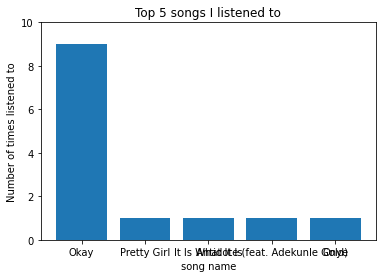

In [17]:
bar_plot = dict(Counter(songs_df['song_names'].values).most_common(5))
plt.bar(*zip(*bar_plot.items()))

yint = []
locs, labels = plt.yticks()
for each in locs:
    yint.append(int(each))
    
plt.yticks(yint)
plt.title('Top 5 songs I listened to')
plt.xlabel('song name')
plt.ylabel('Number of times listened to')

plt.show()

## Who are the top 5 artistes I listened to?

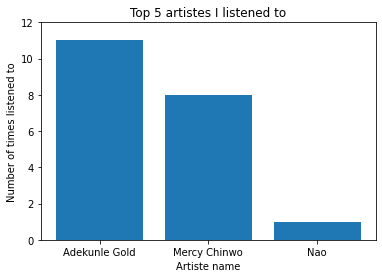

In [18]:
bar_plot = dict(Counter(songs_df['artiste_name'].values).most_common(5))
plt.bar(*zip(*bar_plot.items()))

yint = []
locs, labels = plt.yticks()
for each in locs:
    yint.append(int(each))
    
plt.yticks(yint)
plt.title('Top 5 artistes I listened to')
plt.xlabel('Artiste name')
plt.ylabel('Number of times listened to')

plt.show()

## How many songs did I listen to at each period of time in the day?

In [19]:
#converting played_at column to a datetime object
songs_df['played_at']=pd.to_datetime(songs_df['played_at'])

#creating a new column, period
songs_df['period'] = (songs_df['played_at'].dt.hour % 24 + 4) // 4
songs_df['period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

In [20]:
songs_df.head()

,song_names,artiste_name,played_at,timestamp,period
0,Pretty Girl,Adekunle Gold,2021-07-08 16:34:38.228000+00:00,2021-07-08,Evening
1,Okay,Adekunle Gold,2021-07-08 16:31:30.951000+00:00,2021-07-08,Evening
2,Okay,Adekunle Gold,2021-07-08 16:29:33.378000+00:00,2021-07-08,Evening
3,Okay,Adekunle Gold,2021-07-08 16:29:22.516000+00:00,2021-07-08,Evening
4,Okay,Adekunle Gold,2021-07-08 16:27:49.913000+00:00,2021-07-08,Evening


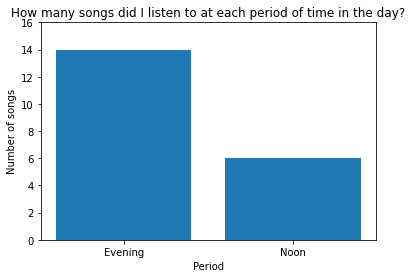

In [21]:
bar_plot = dict(Counter(songs_df['period'].values))
plt.bar(*zip(*bar_plot.items()))

yint = []
locs, labels = plt.yticks()
for each in locs:
    yint.append(int(each))
    
plt.yticks(yint)
plt.title('How many songs did I listen to at each period of time in the day?')
plt.xlabel('Period')
plt.ylabel('Number of songs')

plt.show()

In [23]:
# creating engine and connecting to database
engine = sqlalchemy.create_engine('sqlite:///my_songs.db') 
conn = sqlite3.connect('my_songs.db')

print ("Opened database successfully")

# creating the table with the columns
conn.execute("""
CREATE TABLE IF NOT EXISTS my_songs(
    song_name VARCHAR(200),
    artist_name VARCHAR(200),
    played_at VARCHAR(200),
    timestamp VARCHAR(200),
    period VARCHAR(20),
    CONSTRAINT primary_key_constraint PRIMARY KEY (played_at)
)
""")
print("Table created successfully")

conn.close()

Opened database successfully
Table created successfully


In [25]:
try:
    songs_df.to_sql('my_songs',engine,index=False, if_exists='append')
except:
    print("Ooops! Data already exists in the database ")

Ooops! Data already exists in the database 
